(3592, 2000)

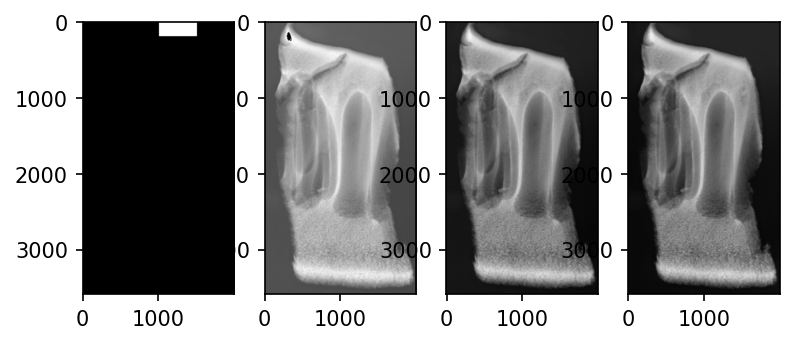

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sscCdi
# path = "/ibira/lnls/beamlines/caterete/proposals/20220257/proc/recons/alignment_134/binning_FRC/alignment_134_binning1.npy"
path = "/ibira/lnls/beamlines/caterete/proposals/20220257/proc/recons/alignment_134/alignment_134_object.npy"

data = np.load(path)[0]
data = -np.angle(data)

data = data[1177:-1289,1332:-2726] #1
unwrappeddata = sscCdi.unwrap.phase_unwrap_new(data)

np.save(path,data)
# unwrappeddata =unwrappeddata[361:-302,227:-2101] #4

mask = np.zeros_like(unwrappeddata,dtype=bool)
mask[0:200,1000:1500] = True

grad = sscCdi.unwrap.RemoveGrad(unwrappeddata,mask)

path2 = "/ibira/lnls/beamlines/caterete/proposals/20220257/proc/recons/alignment_134/binning_FRC/alignment_134_binning1_nograd.npy"

np.save(path2,grad)

fig, ax = plt.subplots(1,4,dpi=150)
ax[0].imshow(mask,cmap='gray')
ax[1].imshow(data,cmap='gray')
ax[2].imshow(unwrappeddata,cmap='gray')
ax[3].imshow(grad,cmap='gray')
data.shape